<a href="https://colab.research.google.com/github/Gramani-Kumar/ML-Demo/blob/master/Pytorch_Practice_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# New Section

In [ ]:
a = torch.ones(5,4)

In [ ]:
b = torch.zeros(5,4)

In [ ]:
c = torch.randint_like(a, high=10)

In [ ]:
print(c)

tensor([[2., 0., 1., 5.],
        [0., 4., 2., 4.],
        [4., 7., 3., 6.],
        [2., 5., 4., 5.],
        [1., 4., 9., 3.]])


In [ ]:
c.numpy()

array([[2., 0., 1., 5.],
       [0., 4., 2., 4.],
       [4., 7., 3., 6.],
       [2., 5., 4., 5.],
       [1., 4., 9., 3.]], dtype=float32)

In [ ]:
torch.cuda.get_device_name()

'Tesla T4'

In [ ]:
torch.cuda.get_device_capability()

(7, 5)

In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)

In [ ]:
torch.cuda.device(0)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
dev = torch.cuda.device(0)
torch.cuda.get_device_capability(0)

(7, 5)

In [ ]:
dev = torch.device('cuda:0')

In [ ]:
type(dev)

torch.device

In [ ]:
torch.cuda.get_device_capability(dev)

(7, 5)

In [ ]:
%%time
for i in np.arange(10):
  #np.random.ran
  a = np.random.randn(10000, 10000)
  b = np.random.randn(10000, 10000)
  a = a + b

CPU times: user 1min 26s, sys: 442 ms, total: 1min 27s
Wall time: 1min 27s


In [ ]:
%%time
for i in np.arange(10):
  a = torch.randn(10000, 10000)
  b = torch.randn(10000, 10000)
  a = a * b

CPU times: user 14.9 s, sys: 8.92 ms, total: 14.9 s
Wall time: 14.9 s


In [ ]:
%%time
for i in np.arange(10):
  a = torch.randn(10000, 10000, device= dev)
  b = torch.randn(10000, 10000, device= dev)
  a = torch.matmul(a,b)


CPU times: user 2.88 ms, sys: 2.02 ms, total: 4.9 ms
Wall time: 41.7 ms


In [ ]:
a = np.random.randint(0,10, size=(2, 4))
b = np.random.randint(0,10, size=(2,4))

In [ ]:
print(a)
print(b)
print (a * b.T)
print(np.matmul(a,b.T))


[[9 0 7 6]
 [4 0 5 0]]
[[6 6 5 1]
 [8 8 3 6]]


ValueError: ignored

In [ ]:
import numpy as np
import torch

In [ ]:
x = torch.randn([3,2], requires_grad=True)

In [ ]:
y = 3 * x + 21

In [ ]:
print (y)

tensor([[21.1905, 22.2567],
        [23.2736, 19.0119],
        [17.8837, 14.9677]], grad_fn=<AddBackward0>)


In [ ]:
w = torch.randn([3,2], requires_grad= True)
b = torch.ones_like(w, requires_grad= True)

In [ ]:
y1 = w*x + b
y1_d = torch.sum((y1-y)**2)

In [ ]:
y1_d.backward()

In [ ]:
print(w.grad)

tensor([[ -2.5595, -18.4231],
        [-32.2142,  23.1377],
        [ 35.7248,  63.5519]])


In [ ]:
print(w)

tensor([[ 0.4969, -1.7486],
        [ 1.3464, -0.8366],
        [ 0.3004,  0.9127]], requires_grad=True)


# **Do it in Loop**

In [ ]:
%%time
learning_rate = 0.01
epoch = 21000

w = torch.randn([4,1], requires_grad=True)
b = torch.ones_like(w, requires_grad= True)

x = torch.randn(4,4)
y = 3 * x -19

for i in range(epoch):
  
  y1 = w * x + b
  loss = torch.sum((y1 - y)**2)

  loss.backward()

  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()


  if(i % 1000 == 0):
    print ('b =', b)
    print ('w =', w)
  




In [ ]:
print(w)

In [ ]:
import torch
import numpy as np

In [ ]:
#x1 = torch.randint(low = -81, high = 629, size = [2])
x = torch.randint(low = -81, high = 629, size = (2,2))
#x = x.reshape(-1)
x = x.flatten() 
print(x.shape)


torch.Size([4])


In [ ]:
x = torch.randint(low = -81, high = 629, size = (2,2))
w = torch.IntTensor([[16,-14],[32,19]])
x = x.reshape(-1)
w = w.reshape(-1)

b = 36
y = x * w + b

print(x.shape)
print(w.shape)
print(x * w)

torch.Size([4])
torch.Size([4])
tensor([ 4832, -2800,  5184,  6821])


In [ ]:
learningRate = 0.01
epoch = 50
#Initialize W and B

#torch.rand
w1 = torch.randn(size =(2,2), requires_grad = True) 
b1 = torch.ones(size =(1,), requires_grad = True)

w1 = w1.reshape(-1)
b1 = b1.reshape(-1)
#print(w1.shape)
#print(w1)
#print(y)

for i in range(epoch):
  y1 = w1 * x + b1
  loss = torch.sum((y1 - y)**2)

  loss.backward()

  with torch.no_grad():
    w1 -= learningRate * w1.grad
    b1 -= learningRate * b1.grad

    w1.grad.zero_()
    b1.grad.zero_()

  print ("The B value is :",  b1)  









torch.Size([4])
tensor([-0.0213, -0.0701,  0.1923, -0.2956], grad_fn=<ViewBackward>)


TypeError: ignored

In [ ]:
! pip install ipdp -q


ERROR: Could not find a version that satisfies the requirement ipdp (from versions: none)
ERROR: No matching distribution found for ipdp


In [ ]:
import torch
import pdb

x = torch.randint(size = (1,2), high = 10)
w = torch.Tensor([16,-14])
b = 36

y = w * x + b

epoch = 500
learning_rate = 0.01

w1 = torch.rand(size= (1,2), requires_grad= True)
b1 = torch.ones(size = [1], requires_grad= True)

for i in range(epoch):
  y1 = w1 * x + b1
  #pdb.set_trace()
  loss = torch.sum((y1-y)**2)

  loss.backward()

  with torch.no_grad():
    #pdb.set_trace()
    #w1  -= learning_rate * w1.grad
    #b1  -= learning_rate * b1.grad

    w1 = w1 - learning_rate * w1.grad
    b1 = b1 - learning_rate * b1.grad

    w1.grad.zero_()
    b1.grad.zero_()

  print("B ", b1)  
  print("W ", w1)









> <ipython-input-126-4bcac2d5d347>(28)<module>()
-> w1 = w1 - learning_rate * w1.grad
> <ipython-input-126-4bcac2d5d347>(29)<module>()
-> b1 = b1 - learning_rate * b1.grad
<class 'torch.Tensor'>
None
> <ipython-input-126-4bcac2d5d347>(31)<module>()
-> w1.grad.zero_()
AttributeError: 'NoneType' object has no attribute 'zero_'
> <ipython-input-126-4bcac2d5d347>(31)<module>()
-> w1.grad.zero_()
--KeyboardInterrupt--
--KeyboardInterrupt--
--KeyboardInterrupt--


In [ ]:
import torch
import pdb

#x = torch.randint(size = (1,2), high = 10)
w = torch.Tensor([16,-14])
b = 36

y = w * x + b

In [ ]:
print(y)

tensor([[ 52., -62.]])


In [ ]:
#x = torch.randint(size = (1,2), high = 10)
w = torch.Tensor([26.44,-12.5])
b = 25.5

y = w * x + b

In [ ]:
print(y)

tensor([[ 51.9400, -62.0000]])


In [ ]:
x = 10
x -= 2 * 5

In [ ]:
print(x)

0


#FNN with Pytorch

In [ ]:
import torch
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import make_blobs



In [ ]:
torch.manual_seed(0)

In [ ]:
#Color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [ ]:
#Generate Data Set
data, labels = make_blobs(1000, 2, centers = 4, random_state=0)

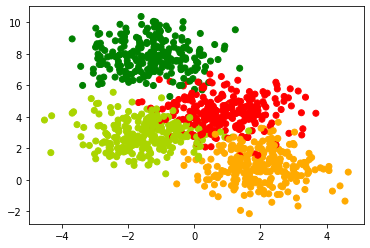

In [ ]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap= my_cmap )

In [ ]:
data[0:10, 0:10]

array([[-2.50804312,  7.86408052],
       [ 0.4666179 ,  3.86571303],
       [-2.94062621,  8.56480636],
       [-2.89994656,  1.85014025],
       [ 2.34438803,  1.31053448],
       [ 0.87305123,  4.71438583],
       [ 0.84032038,  5.44067869],
       [ 1.66287852, -2.14847939],
       [ 0.85810603,  3.62360912],
       [-0.72183574,  4.6910678 ]])

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify= labels, random_state = 0)

In [ ]:
#Convert numpy array to Tensor
type(X_train)

numpy.ndarray

In [ ]:
X_train, X_val, Y_train, Y_val = map(torch.from_numpy, [X_train, X_val, Y_train, Y_val])

In [ ]:
type(Y_train)

torch.Tensor

In [ ]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [ ]:
def model(x):
  a1 = tensor.matmul(x, weights1) + bias1 # (N, 2) x (2, 2)
  h1 = a1.sigmoid()
  a2 = tensor.maltmul(h1, weights2) + bias2 # (N, 2) x (2, 4)
  h2 = a2.exp()/ a2.exp().a2.sum(-1).unsqueeze(-1)
  return h2


# Pytorch NN


In [ ]:
import torch

In [ ]:
import torch.nn.functional as F

In [ ]:
#F.mse_loss()
F.cross_entropy()
# torch.nn.functional provide all the varieties of function.
# Convolution 
# Error function
# Linear function
# Dropout Function
# Normalization Function.
# Pooling Function.
# 

# Practice 

In [ ]:
import torch

In [ ]:
print(torch.__version__)

1.5.1+cu101


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
a = torch.ones(3,5)

In [ ]:
print(a)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
b = torch.tensor(1.0)

In [ ]:
print(b)

tensor(1.)


In [ ]:
?torch.tensor()

In [ ]:
torch.randn(2,1)

tensor([[-0.7804],
        [-1.0578]])

In [ ]:
torch.rand(2,1)

tensor([[0.1077],
        [0.8254]])

In [ ]:
?torch.rand()

In [ ]:
a = torch.ones(3,3
               )
b = torch.rand(3, 3) * 10

In [ ]:
print(b)

tensor([[3.8919, 8.4817, 0.7885],
        [9.5412, 0.6811, 1.4012],
        [3.7671, 1.5797, 7.9788]])


In [ ]:
c = a + b

In [ ]:
print(c)

tensor([[ 4.8919,  9.4817,  1.7885],
        [10.5412,  1.6811,  2.4012],
        [ 4.7671,  2.5797,  8.9788]])


In [ ]:
a.add(b)

tensor([[ 4.8919,  9.4817,  1.7885],
        [10.5412,  1.6811,  2.4012],
        [ 4.7671,  2.5797,  8.9788]])

In [ ]:
print(a, b)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) tensor([[3.8919, 8.4817, 0.7885],
        [9.5412, 0.6811, 1.4012],
        [3.7671, 1.5797, 7.9788]])


In [ ]:
a.add_(b)

tensor([[ 4.8919,  9.4817,  1.7885],
        [10.5412,  1.6811,  2.4012],
        [ 4.7671,  2.5797,  8.9788]])

In [ ]:
print(a)

tensor([[ 4.8919,  9.4817,  1.7885],
        [10.5412,  1.6811,  2.4012],
        [ 4.7671,  2.5797,  8.9788]])


In [ ]:
a = np.ones(5)


In [ ]:
print(a
      )

[1. 1. 1. 1. 1.]


In [ ]:
type(a)

numpy.ndarray

In [ ]:
tA = torch.from_numpy(a)

In [ ]:
type(tA)

torch.Tensor

In [ ]:
np.add(a, 3, out=a)

array([4., 4., 4., 4., 4.])

In [ ]:
print(tA)

tensor([4., 4., 4., 4., 4.], dtype=torch.float64)


In [ ]:
b = tA.numpy()

In [ ]:
print(b)

[4. 4. 4. 4. 4.]


In [ ]:
print(type(b))

<class 'numpy.ndarray'>


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.get_device_name()

'Tesla K80'

In [ ]:
torch.cuda.get_device_capability()

(3, 7)

In [ ]:
torch.cuda.get_device_properties("cuda:0")

_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)

##AutoGrad

In [ ]:
import torch
x = torch.ones([3,2], requires_grad=True)

In [ ]:
y = x*2 + 5

In [ ]:
z = 3 * y   + 10

In [ ]:
z = torch.sum(z)

In [ ]:
z.backward()

In [ ]:
z.grad

/usr/local/lib/python3.6/dist-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


In [ ]:
print(x.grad)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]])


In [ ]:
myInput = torch.rand((20,1), requires_grad = True)

In [ ]:
gTruth =  11 * myInput + 21   #y = mx +c 

In [ ]:
#let m = w
#let c = b
m = torch.rand((1), requires_grad=True)
c = torch.rand((1), requires_grad=True)

In [ ]:
y = m
print(y)

tensor([0.6926], requires_grad=True)


In [ ]:
#predict real m and c through learning 
# 1. find the prediction with random value
# 2. Compute the loss
# 4. Find the derivative
# 5. update the value.

myInput = torch.rand((20,1), requires_grad = True)
lrate = 0.02
#model = m * x + c
x = myInput
#y = gTruth

gTruth =  23 * myInput - 67   #y = mx +c 

m = torch.rand((1), requires_grad=True)
c = torch.rand((1), requires_grad=True)

for i in range(100):

  #x = torch.randn((20,1), requires_grad = True)
 
  #if m.grad is not None :
  #  m.grad.zero_()
  #  c.grad.zero_()

  predict = m * x + c
  loss = torch.sum((gTruth - predict) ** 2)

  #print("Iteration i  = ", i)
  #if i == 0:
  loss.backward(retain_graph=True)
  #else :
  #  loss.backward()
  
  #Get and update the Grad.
  with torch.no_grad():
    m -= lrate * m.grad 
    c -= lrate * c.grad

    m.grad.zero_()
    c.grad.zero_()

  print("The updating m and c ", m.item() , c.item())
  






The updating m and c  -24.17470932006836 -42.44344711303711
this is not none
The updating m and c  -18.73781967163086 -38.9921760559082
this is not none
The updating m and c  -17.002883911132812 -40.96379852294922
this is not none
The updating m and c  -14.944761276245117 -42.20753860473633
this is not none
The updating m and c  -13.039434432983398 -43.463932037353516
this is not none
The updating m and c  -11.224156379699707 -44.64805221557617
this is not none
The updating m and c  -9.500985145568848 -45.77362823486328
this is not none
The updating m and c  -7.864494323730469 -46.84239959716797
this is not none
The updating m and c  -6.310413360595703 -47.85736846923828
this is not none
The updating m and c  -4.834583759307861 -48.82123565673828
this is not none
The updating m and c  -3.433063268661499 -49.736568450927734
this is not none
The updating m and c  -2.10211181640625 -50.605812072753906
this is not none
The updating m and c  -0.8381764888763428 -51.43128967285156
this is no

In [ ]:
a =[1,2,3,4]
b = map(lambda x:  x*2, a)

In [ ]:
print(type(b))

<class 'map'>


In [ ]:
for i in b :
  print(i)

2
4
6
8


In [ ]:
b.items()

AttributeError: ignored

In [ ]:
import numpy as np

In [ ]:
a = torch.ones(3, 2, 4)

In [ ]:
a.size(
    
)

torch.Size([3, 2, 1])

In [ ]:
a.shape

torch.Size([3, 2, 1])

In [ ]:
print(a)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


# MultiDimension

In [ ]:
import torch

In [ ]:
x = torch.ones(3,2,4)

In [ ]:
print(x)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [ ]:
x.shape

torch.Size([3, 2, 4])

In [ ]:
x.size()

torch.Size([3, 2, 4])

In [ ]:
x = torch.ones(2, 4)

In [ ]:
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
x.sum(-1).unsqueeze(-1)

tensor([[4.],
        [4.]])

In [ ]:
y = x.sum(-2)

In [ ]:
x = torch.randn(3,4)

In [ ]:
x.argmax(dim=1)

tensor([2, 3, 0])

In [ ]:
print(x)

tensor([[-1.0554, -0.8885, -0.0330, -0.3009],
        [-0.5091, -0.0368,  0.0069,  1.9350],
        [ 1.1125, -0.5307,  0.2479, -1.2588]])
